# Lab_Homework_#2 Madhu

Using the Pima Indian dataset, build the best machine learning model that you can to predict whether or not the women in the dataset have diabetes. 
    • Clean and transform the data as you desire 
    • Summarize and/or visualize the data 
    • Standardize the data
    • Choose 2-5 algorithms and perform 10-fold cross validation 
    • Display a boxplot and select the best performing model 
    • Tune its hyperparameters (manually or using grid search) 
    • Train the same algorithm on your full training set (no cross validation) ( model.fit(X_std_train, y_train)) 
    • Test the model on your test set ( model.score(X_test, y_test) ) 
    • Display the Precision, Recall, and F1 score metrics along with a confusion matrix 
    • Be able to explain what the scores and confusion matrix mean pertaining to your data 

** Things to possibly try to improve your model's performance: 
   try different algorithms, tune the hyperparameters, Grid Search, try a different scaler (standardization vs. normalization),
   imputation, feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

### Get Pima data

In [2]:
master_dataframe = pd.read_csv("pima_diabetes.csv")
#master_dataframe[::] # To see all the rows in the master data
master_dataframe.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
# drop returns a copy
#df = master_dataframe.drop(['skin'], axis=1) 
df_nts = master_dataframe.drop(['skin','thickness', 'diab_pred'], axis=1)
df_nts.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,age,diabetes
0,6,148,72,0,33.6,50,True
1,1,85,66,0,26.6,31,False
2,8,183,64,0,23.3,32,True
3,1,89,66,94,28.1,21,False
4,0,137,40,168,43.1,33,True


In [4]:
# note the mean of "insulin"
df = df_nts
df["insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insulin, dtype: float64

In [5]:
# select the columns where zeros don't make sense (are missing values) and locate the zeros as a mask
#mask = df[['glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi','diab_pred', 'age']] == 0
mask = df[['glucose_conc', 'diastolic_bp', 'insulin','bmi','age']] == 0
mask

,glucose_conc,diastolic_bp,insulin,bmi,age
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,True,False,False
6,False,False,False,False,False
7,False,True,True,False,False
8,False,False,False,False,False
9,False,False,True,True,False


In [6]:
# replace the zeros with np.nan (Not a Number)
df[mask] = np.nan
df.head(25)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,age,diabetes
0,6,148.0,72.0,NaN,33.6,50,True
1,1,85.0,66.0,NaN,26.6,31,False
2,8,183.0,64.0,NaN,23.3,32,True
3,1,89.0,66.0,94.0,28.1,21,False
4,0,137.0,40.0,168.0,43.1,33,True
5,5,116.0,74.0,NaN,25.6,30,False
6,3,78.0,50.0,88.0,31.0,26,True
7,10,115.0,NaN,NaN,35.3,29,False
8,2,197.0,70.0,543.0,30.5,53,True
9,8,125.0,96.0,NaN,NaN,54,True


In [7]:
# again, note the mean of "insulin" now that the zeros are replaced with np.nan
df["insulin"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: insulin, dtype: float64

In [8]:
## Added. Get the descripton of all the columns

## Following doesn't gives all the components of describe
#mask.describe()

## Following gives all NaN
#df[mask].describe()

df[["num_preg", "glucose_conc", "diastolic_bp", "insulin", "bmi", "age"]].describe()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,age
count,768.000000,763.000000,733.000000,394.000000,757.000000,768.000000
mean,3.845052,121.686763,72.405184,155.548223,32.457464,33.240885
std,3.369578,30.535641,12.382158,118.775855,6.924988,11.760232
min,0.000000,44.000000,24.000000,14.000000,18.200000,21.000000
25%,1.000000,99.000000,64.000000,76.250000,27.500000,24.000000
50%,3.000000,117.000000,72.000000,125.000000,32.300000,29.000000
75%,6.000000,141.000000,80.000000,190.000000,36.600000,41.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000


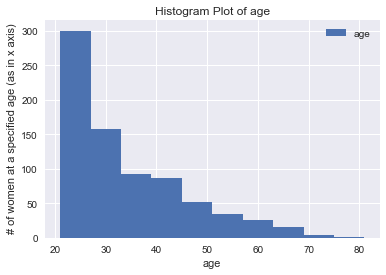

In [9]:
# plot age.
fig, ax = plt.subplots()
ax.hist(df["age"])
## Addning legend, title, xlable & ylable
ax.legend()
ax.set_title("Histogram Plot of age")
ax.set_ylabel(" # of women at a specified age (as in x axis)")
ax.set_xlabel("age")
plt.show()

In [10]:
#df['bmi'].describe() #Already done. See above

In [11]:
df[df["age"] > 40].mean()

num_preg          6.639175
glucose_conc    131.740933
diastolic_bp     78.306878
insulin         201.242857
bmi              33.051042
age              50.273196
diabetes          0.525773
dtype: float64

In [12]:
# example imputation: replacing all missing insulin values for anyone over 40 
                    # with the mean insulin value of all individuals over 40
from sklearn.preprocessing import Imputer

fill_nan = Imputer(missing_values=np.nan, strategy="mean", axis=0)

## ORIGINAL -> df.loc[df["age"] > 40, "insulin"] = fill_nan.fit_transform(df.loc[df["age"] > 40, "insulin"].values.reshape(-1, 1))
#Impute 'insulin' for 'age' > 40
df.loc[df["age"] > 40, "insulin"] = fill_nan.fit_transform(df.loc[df["age"] > 40, "insulin"].values.reshape(-1, 1))
# How the insulin mean '201.242857' gets inserted for age > 40 ?

#Impute 'insulin' for 'age' < 40
df.loc[df["age"] <= 40, "insulin"] = fill_nan.fit_transform(df.loc[df["age"] <= 40, "insulin"].values.reshape(-1, 1))

# Replacing NULL values of 'bmi' with mean of 'bmi' column
df.loc[df['bmi'].isnull(),'bmi'] = df['bmi'].mean()

X = df[["num_preg", "glucose_conc", "diastolic_bp", "insulin", "bmi", "age"]].values
print("Original X= \n", X[:15])
#df.head()
X = X.astype(int)
print("****************************************************** \n")
print("bmi column in X (typecast to int) = \n", X[:,4])

Original X= 
 [[  6.         148.          72.         201.24285714  33.6
   50.        ]
 [  1.          85.          66.         145.67592593  26.6
   31.        ]
 [  8.         183.          64.         145.67592593  23.3
   32.        ]
 [  1.          89.          66.          94.          28.1
   21.        ]
 [  0.         137.          40.         168.          43.1
   33.        ]
 [  5.         116.          74.         145.67592593  25.6
   30.        ]
 [  3.          78.          50.          88.          31.
   26.        ]
 [ 10.         115.                  nan 145.67592593  35.3
   29.        ]
 [  2.         197.          70.         543.          30.5
   53.        ]
 [  8.         125.          96.         201.24285714  32.45746367
   54.        ]
 [  4.         110.          92.         145.67592593  37.6
   30.        ]
 [ 10.         168.          74.         145.67592593  38.
   34.        ]
 [ 10.         139.          80.         201.24285714  27.1
   57.   

In [13]:
# Feature Engineering
#f = lambda x: x**2            
#df[col].map(f)  # for element-wise application)

# or

#df[new_col] = df[col_1]/df[col_2]

In [14]:
y = master_dataframe["diabetes"]
y.head()

0     True
1    False
2     True
3    False
4     True
Name: diabetes, dtype: bool

In [15]:
# Transform categorical values to binary
y = y.map({False:0, True:1}).values
#y[:5]
#y

In [16]:
# split dataset into test/train
from sklearn.model_selection import train_test_split
#if X[::] == 0:
#    print("X= ", X)

if (df[['glucose_conc', 'diastolic_bp', 'insulin','bmi','age']].any == 0):
    mask2 = df[['glucose_conc', 'diastolic_bp', 'insulin','bmi','age']]
    print("Before splitting into 'train & test' mask2= \n", mask2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

print("After Splitting X, X_train= \n", X_train)

#print("y_train= ", y_train)

After Splitting X, X_train= 
 [[ 15 136  70 110  37  43]
 [  0  97  64 100  36  25]
 [  1 116  70 145  27  21]
 ...
 [ 13 126  90 201  43  42]
 [  4 171  72 145  43  26]
 [  9 102  76 201  32  46]]


In [17]:
# For Cross Validation with built-in StandardScaler()
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print("X_train_std[:5]= \n", X_train_std[:5])

#X_std = stdsc.fit_transform(X)
#X_std[:5]

X_test_std = stdsc.transform(X_test) 
print("X_test_std[:5]= \n", X_test_std[:5])

X_train_std[:5]= 
 [[ 3.3536084   0.07495326  0.22556734 -0.62228588  0.76058062  0.81020454]
 [-1.12101735  0.07495301  0.22556732 -0.74361604  0.61554092 -0.69526203]
 [-0.82270897  0.07495313  0.22556734 -0.19763033 -0.68981637 -1.02981015]
 [-0.52440058  0.07495307  0.22556732 -0.51308874 -0.25469727  0.05747126]
 [-1.12101735  0.07495318  0.22556738 -0.19763033  0.47050122 -0.3607139 ]]
X_test_std[:5]= 
 [[ 0.96714133  0.07495326  0.22556735 -0.31896049 -0.83485607  1.47930079]
 [-0.82270897  0.07495335  0.22556732 -0.19763033 -0.83485607 -0.94617312]
 [ 0.66883295  0.07495309  0.22556732 -0.19763033 -0.97989577 -0.52798796]
 [-0.2260922   0.07495279  0.22556736  0.48181855  0.32546152  1.06111563]
 [-0.82270897  0.07495313  0.22556736  0.22702522  0.61554092 -0.69526203]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# Write scalers

def standardize(df):
    #pass
    print("df_mean= ", df.mean())
    print("df_std= ", df.std())
    return (df - df.mean())/df.std()

def normalize(df):
    #pass
    df.min()
    df.max()
    return (df - df.min())/(df.max() - df.min())

In [19]:
X_train_stdz = standardize(X_train)
print("X_train_std= \n", X_train_std)

df_mean=  -19328615.833333332
df_std=  202816274.98563832
X_train_std= 
 [[ 3.3536084   0.07495326  0.22556734 -0.62228588  0.76058062  0.81020454]
 [-1.12101735  0.07495301  0.22556732 -0.74361604  0.61554092 -0.69526203]
 [-0.82270897  0.07495313  0.22556734 -0.19763033 -0.68981637 -1.02981015]
 ...
 [ 2.75699163  0.0749532   0.22556738  0.48181855  1.63081881  0.72656751]
 [ 0.07221618  0.07495348  0.22556734 -0.19763033  1.63081881 -0.611625  ]
 [ 1.5637581   0.07495305  0.22556735  0.48181855  0.03538212  1.06111563]]


In [20]:
X_train_nmldz = normalize(X_train)
print("X_train_nmldz= \n", X_train_nmldz)
#print("X_train_nmldz.astype(int32)= \n", X_train_nmldz.astype(int))

X_train_nmldz= 
 [[1.00000034 1.00000028 1.00000031 1.0000003  1.00000033 1.00000033]
 [1.00000035 1.0000003  1.00000032 1.0000003  1.00000033 1.00000033]
 [1.00000035 1.00000029 1.00000031 1.00000028 1.00000033 1.00000034]
 ...
 [1.00000034 1.00000029 1.0000003  1.00000025 1.00000033 1.00000033]
 [1.00000034 1.00000027 1.00000031 1.00000028 1.00000033 1.00000033]
 [1.00000034 1.0000003  1.00000031 1.00000025 1.00000033 1.00000033]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in long_scalars
  del sys.path[0]


# ML Models

In [21]:
# Logistic Regression
# --- Key Parameters ---
# C: the regularization strength (smaller values for greater regularization); default is 1.0
# penalty: used to specify the penalization used for regularizartion; default is l2
from sklearn.linear_model import LogisticRegression
lgt_reg = LogisticRegression(C = 1)

# Support Vector Machine
# --- Key Parameters ---
# C: how much penalty there is for misclassification (smaller values for greater penalty); default is 1.0
# kernel: specifies the kernel type to be used (often 'rbf' or 'linear'); default is 'rbf'
# gamma: the coefficient for non-linear kernels
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

# Random Forest (ensemble of Decision Trees)
# --- Key Parameters ---
# n_estimators: the number of trees in the forest; default is 10
# max_depth: the depth of the tree; defualt is None, full expansion
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)

# k-Nearest Neighbor
# --- Key Parameters ---
# n_neighbors: number of neighbors to use; default is 5
# weights: weight function used; default is 'uniform'
        # 'uniform' means all points are weighted equally; '
        # 'distance' means closer points have greater influence;
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Neural Network
# --- Key Parameters ---
# hidden_layer_sizes: a tuple representing the number of nodes for respective layer; default is (100,)
# activation: the activation function for the hidden layer; defualt is 'relu'
        # usually 'relu', 'tanh', or 'sigmoid'
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lgt_reg, X_train_std, y_train, scoring='accuracy', cv=10)
def display_scores(scores):
    print("LogisticRegression Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [23]:
display_scores(scores)

LogisticRegression Scores: [0.61818182 0.67272727 0.70909091 0.64814815 0.67924528 0.79245283
 0.81132075 0.60377358 0.73584906 0.73584906]
Mean: 0.7006638714185883
Standard deviation: 0.06588269548460979


In [24]:
classifiers = [lgt_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [25]:
#help(MLPClassifier)

In [26]:
# Change to max_iter=300, solver='sgd'
mnn = MLPClassifier(max_iter=300, solver='sgd')

In [27]:
m_classifiers = [lgt_reg, knn, svm, forest, mnn]

m_model_scores = []
for clf in m_classifiers:
    m_model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

In [28]:
# For original nn model
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])
models_df

,1,2,3,4,5,6,7,8,9,10
LR,0.618182,0.672727,0.709091,0.648148,0.679245,0.792453,0.811321,0.603774,0.735849,0.735849
KNN,0.672727,0.654545,0.690909,0.611111,0.679245,0.830189,0.698113,0.698113,0.716981,0.679245
SVM,0.600000,0.636364,0.727273,0.629630,0.641509,0.773585,0.773585,0.660377,0.754717,0.698113
Forest,0.690909,0.727273,0.709091,0.740741,0.792453,0.716981,0.716981,0.660377,0.716981,0.679245
NN,0.581818,0.654545,0.654545,0.666667,0.735849,0.830189,0.811321,0.584906,0.735849,0.660377


In [29]:
# For modified NN model mnn
m_models_df = pd.DataFrame(m_model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "mNN"])
m_models_df

,1,2,3,4,5,6,7,8,9,10
LR,0.618182,0.672727,0.709091,0.648148,0.679245,0.792453,0.811321,0.603774,0.735849,0.735849
KNN,0.672727,0.654545,0.690909,0.611111,0.679245,0.830189,0.698113,0.698113,0.716981,0.679245
SVM,0.600000,0.636364,0.727273,0.629630,0.641509,0.773585,0.773585,0.660377,0.754717,0.698113
Forest,0.690909,0.727273,0.709091,0.740741,0.792453,0.716981,0.716981,0.660377,0.716981,0.679245
mNN,0.654545,0.654545,0.727273,0.629630,0.641509,0.811321,0.792453,0.641509,0.773585,0.698113


# Boxplot and Model Selection

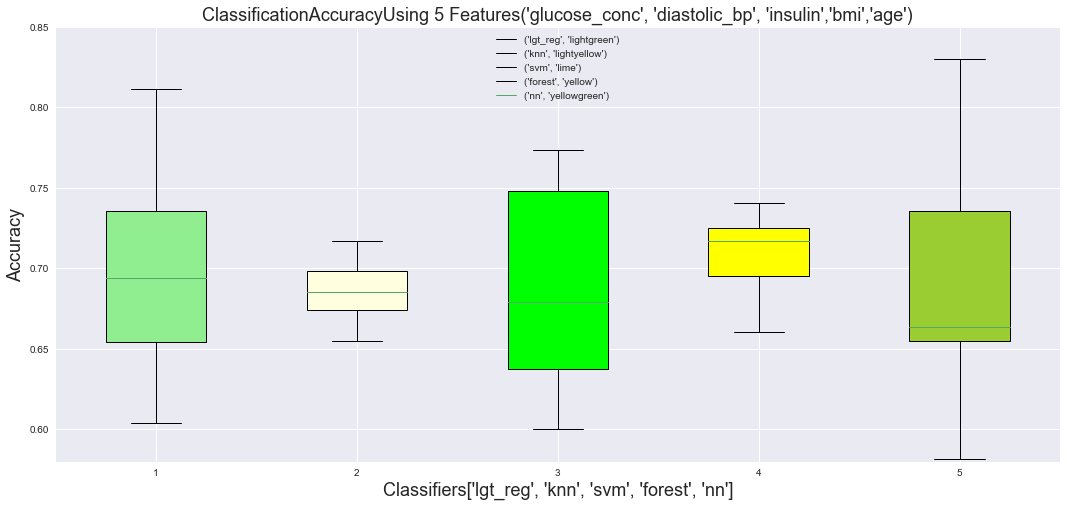

In [34]:
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
#axes.set_xlabel('Classification Models', fontsize=18)
axes.set_xlabel("Classifiers['lgt_reg', 'knn', 'svm', 'forest', 'nn']", fontsize=18)
#axes.set_xlim(['log_reg', 'knn', 'svm', 'forest', 'nn'])

axes.set_ylabel('Accuracy', fontsize=18)
#axes.set_ylim((.4, 1.1))
axes.set_ylim((.58, .85))
axes.set_title("ClassificationAccuracyUsing 5 Features('glucose_conc', 'diastolic_bp', 'insulin','bmi','age')", fontsize = 18)

## Adding legends for the models 
axes.legend([('lgt_reg','lightgreen'), ('knn','lightyellow'), ('svm','lime'), ('forest','yellow'), ('nn','yellowgreen')])

# Hyperparameter Tuning (on selected models)

In [39]:
# hyperparameter tuning can be done manually or using Grid Search with Cross-validation

#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Grid Search
param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#gs = GridSearchCV(estimator=log_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=3)
gs = GridSearchCV(estimator=lgt_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=3)

## "n_neighbors: [3, 5, 7]" gives an error
#gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform'], n_neighbors: [3, 5, 7]}], scoring='accuracy', cv=3)

## After removing "n_neighbors: [3, 5, 7]"no errors
#gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform']}], scoring='accuracy', cv=3)

## After adding quotes '' for (unquoted) n_neighbors there are no errors
gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform'], 'n_neighbors': [3, 5, 7]}], scoring='accuracy', cv=3)

# Cross Validation, evaluates the returned model
cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10)

array([0.6       , 0.61818182, 0.69090909, 0.62962963, 0.67924528,
       0.77358491, 0.71698113, 0.66037736, 0.67924528, 0.62264151])

# Retrain tuned model using ALL Training data

In [40]:
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \n Test score: {}".format(train_score, test_score))

Train score: 0.7877094972067039 
 Test score: 0.683982683982684


# Confusion Matrix

Precision: 0.806, Recall: 0.588, F1: 0.680
             precision    recall  f1-score   support

      other       0.79      0.92      0.85       146
   Diabetes       0.81      0.59      0.68        85

avg / total       0.80      0.80      0.79       231



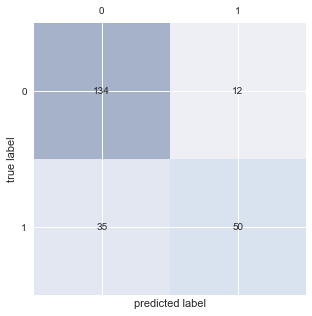

In [41]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred) # <- ???

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["other", "Diabetes"]))

# Train final model on FULL dataset (ALL Training and Test data)

In [42]:
from sklearn.externals import joblib

# scale/standardize X (the original full dataset)
X_std = stdsc.fit_transform(X)

forest.fit(X_std, y)

# save the model to disk
joblib.dump(forest, 'ML_LabHW2_final_forest_model.sav')
 
# load the model from disk
forest_final = joblib.load('ML_LabHW2_final_forest_model.sav')

# use the model as before
accuracy = forest_final.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
